In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
merged = transactions.merge(customers, on='CustomerID', how='left')


In [4]:
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',   # Total quantity purchased
    'TransactionID': 'count',  # Purchase frequency
    'Region': lambda x: x.mode()[0]  # Most frequent region
}).reset_index()

In [5]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)


In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))


In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
customer_features['Cluster'] = kmeans_labels


In [9]:
db_index = davies_bouldin_score(scaled_features, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.2353857106884882


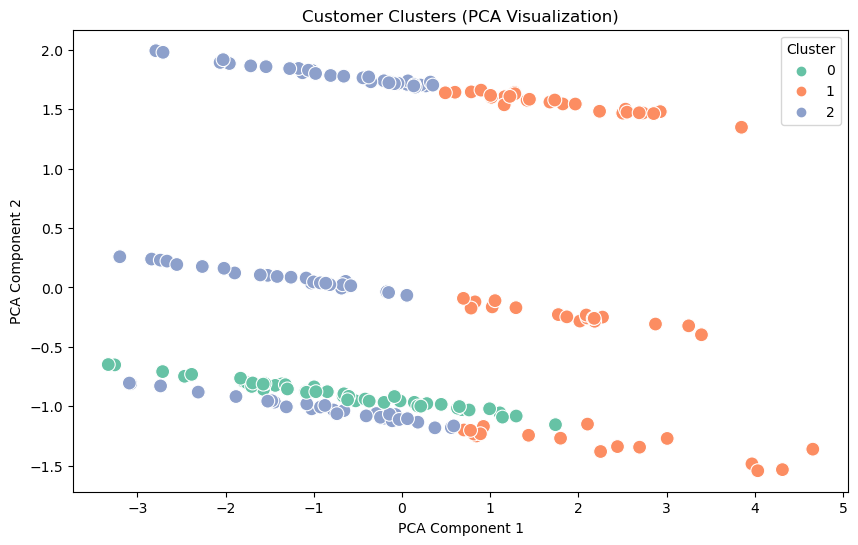

In [10]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='Set2', s=100)
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [11]:
cluster_insights = customer_features.groupby('Cluster').agg({
    'TotalValue': 'mean',
    'Quantity': 'mean',
    'TransactionID': 'mean'
}).rename(columns={
    'TotalValue': 'Avg_Spending',
    'Quantity': 'Avg_Quantity',
    'TransactionID': 'Avg_Frequency'
})

In [12]:
print("Cluster Insights:")
print(cluster_insights)

Cluster Insights:
         Avg_Spending  Avg_Quantity  Avg_Frequency
Cluster                                           
0         3054.936383     11.000000       4.425532
1         5347.277705     19.573770       7.442623
2         2420.105604      9.076923       3.714286


In [14]:
from fpdf import FPDF
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Example Data (replace with your actual data)
np.random.seed(42)
data = np.random.rand(100, 5)  # Replace with your dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data, kmeans_labels)

# Example Cluster Insights (replace with your actual insights)
cluster_insights = pd.DataFrame({
    'Avg_Spending': [200, 150, 300],
    'Avg_Quantity': [20, 15, 25],
    'Avg_Frequency': [10, 8, 12]
}, index=[0, 1, 2])

# PCA for Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data)

# Initialize PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add Title
pdf.set_font("Arial", style="B", size=16)
pdf.cell(200, 10, txt="Clustering Results Report", ln=True, align="C")
pdf.ln(10)

# Add DB Index
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt=f"Davies-Bouldin Index: {db_index:.3f}", ln=True)
pdf.ln(10)

# Add Cluster Insights
pdf.set_font("Arial", style="B", size=14)
pdf.cell(200, 10, txt="Cluster Insights:", ln=True)
pdf.ln(5)

for cluster, row in cluster_insights.iterrows():
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, txt=f"Cluster {cluster}:\n"
                              f"  - Avg Spending: ${row['Avg_Spending']:.2f}\n"
                              f"  - Avg Quantity: {row['Avg_Quantity']:.2f}\n"
                              f"  - Avg Frequency: {row['Avg_Frequency']:.2f}")
    pdf.ln(5)

# Add Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='Set2', s=100)
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

# Save the plot
visualization_path = "cluster_visualization.png"
plt.savefig(visualization_path)
plt.close()

# Add Visualization to PDF
pdf.add_page()
pdf.image(visualization_path, x=10, y=20, w=190)

# Save PDF
output_pdf = "Firstname_Lastname_Clustering.pdf"
pdf.output(output_pdf)

print(f"Clustering results report saved as {output_pdf}.")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering results report saved as Firstname_Lastname_Clustering.pdf.
